## Importing Necessary libraries

In [1]:
import pandas as pd 
import numpy as np 
import pyodbc # For DB Connection
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

## Reading Data From DB

In [2]:
conn_str = (
    'DRIVER={ODBC Driver 17 for SQL Server};'
    'SERVER=Omar\OMAR;'            # Server name (mine is : OMAR/Omar )
    'DATABASE=INSTANT;'            # DATABASE name(INSTANT)
    'Trusted_Connection=yes;'
)


In [3]:
conn = pyodbc.connect(conn_str)

In [4]:
query = "SELECT * FROM dbo.shopping_trends"
df = pd.read_sql(query, conn)

df 

,Customer_ID,Age,Gender,Item_Purchased,Category,Purchase_Amount_USD,Location,Size,Color,Season,Review_Rating,Subscription_Status,Payment_Method,Shipping_Type,Discount_Applied,Promo_Code_Used,Previous_Purchases,Preferred_Payment_Method,Frequency_of_Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Credit Card,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Bank Transfer,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Cash,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,PayPal,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Cash,Free Shipping,Yes,Yes,31,PayPal,Annually
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3895,3896,40,Female,Hoodie,Clothing,28,Virginia,L,Turquoise,Summer,4.2,No,Cash,2-Day Shipping,No,No,32,Venmo,Weekly
3896,3897,52,Female,Backpack,Accessories,49,Iowa,L,White,Spring,4.5,No,PayPal,Store Pickup,No,No,41,Bank Transfer,Bi-Weekly
3897,3898,46,Female,Belt,Accessories,33,New Jersey,L,Green,Spring,2.9,No,Credit Card,Standard,No,No,24,Venmo,Quarterly
3898,3899,44,Female,Shoes,Footwear,77,Minnesota,S,Brown,Summer,3.8,No,PayPal,Express,No,No,24,Venmo,Weekly


## Data Cleaning

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer_ID               3900 non-null   int64  
 1   Age                       3900 non-null   int64  
 2   Gender                    3900 non-null   object 
 3   Item_Purchased            3900 non-null   object 
 4   Category                  3900 non-null   object 
 5   Purchase_Amount_USD       3900 non-null   int64  
 6   Location                  3900 non-null   object 
 7   Size                      3900 non-null   object 
 8   Color                     3900 non-null   object 
 9   Season                    3900 non-null   object 
 10  Review_Rating             3900 non-null   float64
 11  Subscription_Status       3900 non-null   object 
 12  Payment_Method            3900 non-null   object 
 13  Shipping_Type             3900 non-null   object 
 14  Discount

In [6]:
df.shape

(3900, 19)

In [7]:
df.nunique()

Customer_ID                 3900
Age                           53
Gender                         2
Item_Purchased                25
Category                       4
Purchase_Amount_USD           81
Location                      50
Size                           4
Color                         25
Season                         4
Review_Rating                 26
Subscription_Status            2
Payment_Method                 6
Shipping_Type                  6
Discount_Applied               2
Promo_Code_Used                2
Previous_Purchases            50
Preferred_Payment_Method       6
Frequency_of_Purchases         7
dtype: int64

In [8]:
df.dtypes

Customer_ID                   int64
Age                           int64
Gender                       object
Item_Purchased               object
Category                     object
Purchase_Amount_USD           int64
Location                     object
Size                         object
Color                        object
Season                       object
Review_Rating               float64
Subscription_Status          object
Payment_Method               object
Shipping_Type                object
Discount_Applied             object
Promo_Code_Used              object
Previous_Purchases            int64
Preferred_Payment_Method     object
Frequency_of_Purchases       object
dtype: object

In [9]:
df.isna().sum()

Customer_ID                 0
Age                         0
Gender                      0
Item_Purchased              0
Category                    0
Purchase_Amount_USD         0
Location                    0
Size                        0
Color                       0
Season                      0
Review_Rating               0
Subscription_Status         0
Payment_Method              0
Shipping_Type               0
Discount_Applied            0
Promo_Code_Used             0
Previous_Purchases          0
Preferred_Payment_Method    0
Frequency_of_Purchases      0
dtype: int64

In [10]:
df.duplicated().sum()

0

In [11]:
df.drop(columns="Customer_ID",inplace=True)

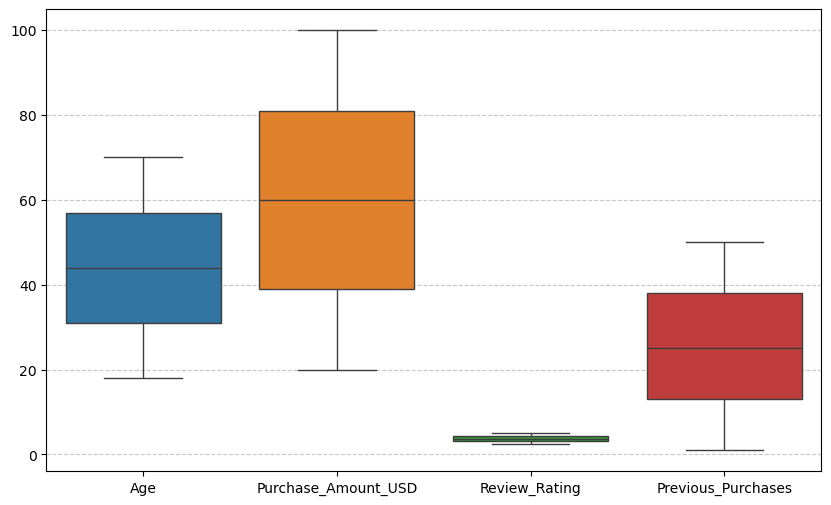

In [12]:
plt.figure(figsize=(10,6))
plt.grid(axis='y', linestyle='--', alpha=0.7)
sns.boxplot(df)
plt.show()

## Exploratory Data Analysis  ( EDA )

In [13]:
df

,Age,Gender,Item_Purchased,Category,Purchase_Amount_USD,Location,Size,Color,Season,Review_Rating,Subscription_Status,Payment_Method,Shipping_Type,Discount_Applied,Promo_Code_Used,Previous_Purchases,Preferred_Payment_Method,Frequency_of_Purchases
0,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Credit Card,Express,Yes,Yes,14,Venmo,Fortnightly
1,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Bank Transfer,Express,Yes,Yes,2,Cash,Fortnightly
2,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Cash,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,PayPal,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Cash,Free Shipping,Yes,Yes,31,PayPal,Annually
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3895,40,Female,Hoodie,Clothing,28,Virginia,L,Turquoise,Summer,4.2,No,Cash,2-Day Shipping,No,No,32,Venmo,Weekly
3896,52,Female,Backpack,Accessories,49,Iowa,L,White,Spring,4.5,No,PayPal,Store Pickup,No,No,41,Bank Transfer,Bi-Weekly
3897,46,Female,Belt,Accessories,33,New Jersey,L,Green,Spring,2.9,No,Credit Card,Standard,No,No,24,Venmo,Quarterly
3898,44,Female,Shoes,Footwear,77,Minnesota,S,Brown,Summer,3.8,No,PayPal,Express,No,No,24,Venmo,Weekly


In [14]:
df.describe()

,Age,Purchase_Amount_USD,Review_Rating,Previous_Purchases
count,3900.000000,3900.000000,3900.000000,3900.000000
mean,44.068462,59.764359,3.749949,25.351538
std,15.207589,23.685392,0.716223,14.447125
min,18.000000,20.000000,2.500000,1.000000
25%,31.000000,39.000000,3.100000,13.000000
50%,44.000000,60.000000,3.700000,25.000000
75%,57.000000,81.000000,4.400000,38.000000
max,70.000000,100.000000,5.000000,50.000000


#### 1- Age

In [15]:
print(f"Max Age = {df.Age.max()}")
print(f"Average Age = {int(df.Age.mean())}")
print(f"Min Age = {df.Age.min()}")

Max Age = 70
Average Age = 44
Min Age = 18


#### 2- Gender 

In [16]:
Gender=df.Gender.value_counts()
Gender

Gender
Male      2652
Female    1248
Name: count, dtype: int64

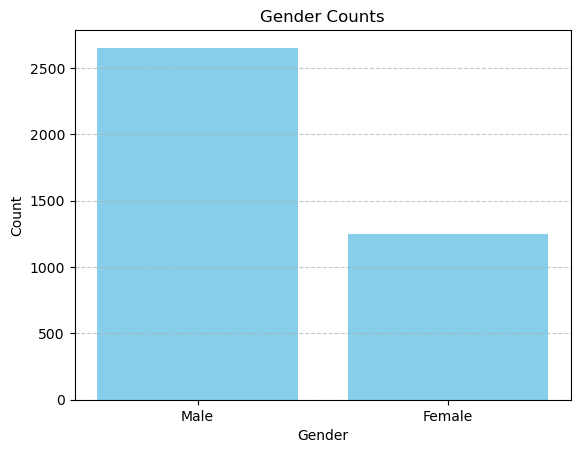

In [17]:
plt.bar(Gender.index,Gender.values ,color='skyblue')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.title("Gender Counts")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()

#### 3- Item_Purchased

In [18]:
df["Item_Purchased"].unique()

array(['Blouse', 'Sweater', 'Jeans', 'Sandals', 'Sneakers', 'Shirt',
       'Shorts', 'Coat', 'Handbag', 'Shoes', 'Dress', 'Skirt',
       'Sunglasses', 'Pants', 'Jacket', 'Hoodie', 'Jewelry', 'T-shirt',
       'Scarf', 'Hat', 'Socks', 'Backpack', 'Belt', 'Boots', 'Gloves'],
      dtype=object)

In [19]:
Items=df["Item_Purchased"].nunique()
Items

25

In [20]:
top10_items = df["Item_Purchased"].value_counts().head(10)
print(top10_items)

Item_Purchased
Blouse        171
Jewelry       171
Pants         171
Shirt         169
Dress         166
Sweater       164
Jacket        163
Belt          161
Sunglasses    161
Coat          161
Name: count, dtype: int64


In [21]:
top3_items = df["Item_Purchased"].value_counts().head(3)
print(top3_items)

Item_Purchased
Blouse     171
Jewelry    171
Pants      171
Name: count, dtype: int64


#### 4- Category

In [22]:
df["Category"].unique()

array(['Clothing', 'Footwear', 'Outerwear', 'Accessories'], dtype=object)

In [23]:
df["Category"].nunique()

4

In [24]:
Category=df["Category"].value_counts()
Category

Category
Clothing       1737
Accessories    1240
Footwear        599
Outerwear       324
Name: count, dtype: int64

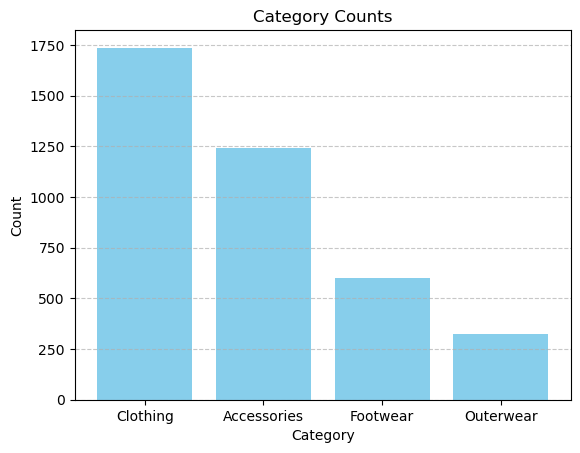

In [25]:
plt.bar(Category.index, Category.values, color='skyblue')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.title("Category Counts")
plt.xlabel("Category")
plt.ylabel("Count")
plt.show()

In [26]:
print(f"The Most Trending Category is Clothing = {df["Category"].value_counts().head(1)}")

The Most Trending Category is Clothing = Category
Clothing    1737
Name: count, dtype: int64


#### 5- Purchase_Amount_USD 

In [27]:
df.Purchase_Amount_USD.sum()

233081

#### 6- Location

In [28]:
df.Location.unique()

array(['Kentucky', 'Maine', 'Massachusetts', 'Rhode Island', 'Oregon',
       'Wyoming', 'Montana', 'Louisiana', 'West Virginia', 'Missouri',
       'Arkansas', 'Hawaii', 'Delaware', 'New Hampshire', 'New York',
       'Alabama', 'Mississippi', 'North Carolina', 'California',
       'Oklahoma', 'Florida', 'Texas', 'Nevada', 'Kansas', 'Colorado',
       'North Dakota', 'Illinois', 'Indiana', 'Arizona', 'Alaska',
       'Tennessee', 'Ohio', 'New Jersey', 'Maryland', 'Vermont',
       'New Mexico', 'South Carolina', 'Idaho', 'Pennsylvania',
       'Connecticut', 'Utah', 'Virginia', 'Georgia', 'Nebraska', 'Iowa',
       'South Dakota', 'Minnesota', 'Washington', 'Wisconsin', 'Michigan'],
      dtype=object)

In [29]:
df.Location.nunique()

50

In [30]:
df.Location.value_counts().head(10)

Location
Montana       96
California    95
Idaho         93
Illinois      92
Alabama       89
Minnesota     88
Nebraska      87
New York      87
Nevada        87
Maryland      86
Name: count, dtype: int64

#### 7- Size 

In [31]:
df.Size.unique()

array(['L', 'S', 'M', 'XL'], dtype=object)

In [32]:
df.Size.nunique()

4

In [33]:
sizes=df.Size.value_counts()
sizes

Size
M     1755
L     1053
S      663
XL     429
Name: count, dtype: int64

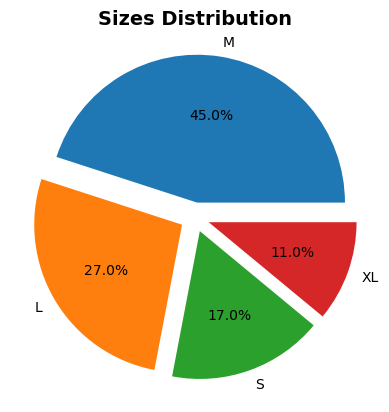

In [34]:
plt.pie(sizes,(.1,.1,.1,.1),sizes.index,autopct='%1.1f%%')
plt.title("Sizes Distribution",fontdict={'fontsize': 14, 'fontweight': 'bold'})
plt.show()

In [35]:
top2_sizes=df.Size.value_counts().head(2)
top2_sizes

Size
M    1755
L    1053
Name: count, dtype: int64

#### 8- Color

In [36]:
df.Color.unique()

array(['Gray', 'Maroon', 'Turquoise', 'White', 'Charcoal', 'Silver',
       'Pink', 'Purple', 'Olive', 'Gold', 'Violet', 'Teal', 'Lavender',
       'Black', 'Green', 'Peach', 'Red', 'Cyan', 'Brown', 'Beige',
       'Orange', 'Indigo', 'Yellow', 'Magenta', 'Blue'], dtype=object)

In [37]:
df.Color.nunique()

25

In [38]:
colores = df.Color.value_counts()
colores

Color
Olive        177
Yellow       174
Silver       173
Teal         172
Green        169
Black        167
Cyan         166
Violet       166
Gray         159
Maroon       158
Orange       154
Charcoal     153
Pink         153
Magenta      152
Blue         152
Purple       151
Peach        149
Red          148
Beige        147
Indigo       147
Lavender     147
Turquoise    145
White        142
Brown        141
Gold         138
Name: count, dtype: int64

In [39]:
top10_colores=colores.head(10)
top10_colores

Color
Olive     177
Yellow    174
Silver    173
Teal      172
Green     169
Black     167
Cyan      166
Violet    166
Gray      159
Maroon    158
Name: count, dtype: int64

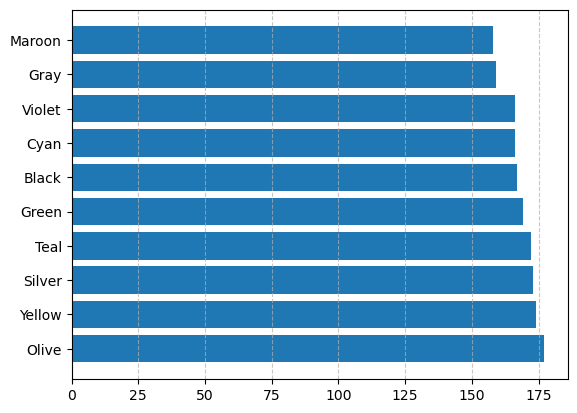

In [40]:
plt.barh(top10_colores.index,top10_colores.values)
plt.grid(axis='x', linestyle='--', alpha=0.7)

plt.show()

In [41]:
top3_colores=colores.head(3)
top3_colores

Color
Olive     177
Yellow    174
Silver    173
Name: count, dtype: int64

#### 9- Season Column

In [42]:
df.Season.unique()

array(['Winter', 'Spring', 'Summer', 'Fall'], dtype=object)

In [43]:
season =df.Season.value_counts()
season

Season
Spring    999
Fall      975
Winter    971
Summer    955
Name: count, dtype: int64

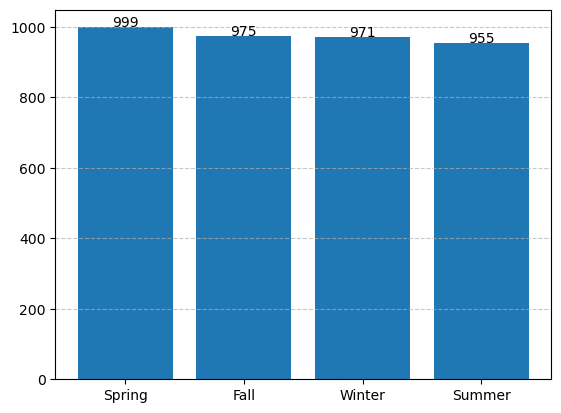

In [44]:
plt.bar(season.index,season.values)
plt.grid(axis='y', linestyle='--', alpha=0.7)
# إضافة الأرقام فوق كل عمود
for i, value in enumerate(season.values):
    plt.text(i, value + 0.5, str(value), ha='center', fontsize=10)  
plt.show()

In [45]:
top2_seasons=season.head(2)
top2_seasons

Season
Spring    999
Fall      975
Name: count, dtype: int64

#### 10- Review_Rating Column

In [46]:
df.Review_Rating.unique()

array([3.0999999 , 3.5       , 2.70000005, 2.9000001 , 3.20000005,
       2.5999999 , 4.80000019, 4.0999999 , 4.9000001 , 4.5       ,
       4.69999981, 2.79999995, 4.5999999 , 3.29999995, 4.4000001 ,
       3.5999999 , 5.        , 4.        , 3.70000005, 4.19999981,
       3.9000001 , 3.        , 3.79999995, 3.4000001 , 4.30000019,
       2.5       ])

In [47]:
df.Review_Rating.nunique()

26

In [48]:
top10_rating = df.Review_Rating.value_counts().head(10)
top10_rating

Review_Rating
3.4    182
4.0    181
4.6    174
4.2    171
2.9    170
4.9    166
3.9    163
3.0    162
2.6    159
4.4    158
Name: count, dtype: int64

In [49]:
top3_rating = df.Review_Rating.value_counts().head(3)
top3_rating

Review_Rating
3.4    182
4.0    181
4.6    174
Name: count, dtype: int64

#### 11- Subscription_Status Column  

In [50]:
Subscription_Status=df.Subscription_Status.value_counts()
Subscription_Status

Subscription_Status
No     2847
Yes    1053
Name: count, dtype: int64

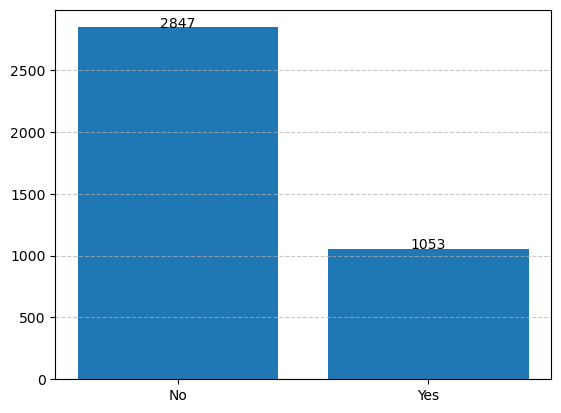

In [51]:
plt.bar(Subscription_Status.index,Subscription_Status.values)
plt.grid(axis='y', linestyle='--', alpha=0.7)
for i, value in enumerate(Subscription_Status.values):
    plt.text(i, value + 0.5, str(value), ha='center', fontsize=10)  
plt.show()

#### 12- Payment_Method Column

In [52]:
df["Payment_Method"].unique()

array(['Credit Card', 'Bank Transfer', 'Cash', 'PayPal', 'Venmo',
       'Debit Card'], dtype=object)

In [53]:
df["Payment_Method"].nunique()

6

In [54]:
Payment_Methods=df["Payment_Method"].value_counts()
Payment_Methods

Payment_Method
Credit Card      696
Venmo            653
Cash             648
PayPal           638
Debit Card       633
Bank Transfer    632
Name: count, dtype: int64

In [55]:
top3_Payment_Methods=Payment_Methods.head(3)
top3_Payment_Methods

Payment_Method
Credit Card    696
Venmo          653
Cash           648
Name: count, dtype: int64

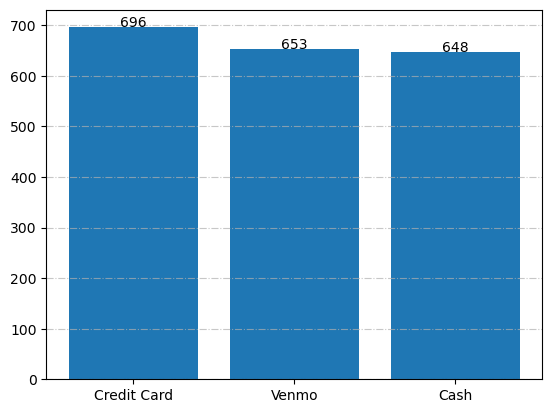

In [56]:
plt.bar(top3_Payment_Methods.index,top3_Payment_Methods.values)
plt.grid(axis='y', linestyle='-.', alpha=0.7)
for i, value in enumerate(top3_Payment_Methods.values):
    plt.text(i, value + 0.5, str(value), ha='center', fontsize=10) 
plt.show()

#### 13- Shipping_Type Column

In [57]:
df["Shipping_Type"].unique()

array(['Express', 'Free Shipping', 'Next Day Air', 'Standard',
       '2-Day Shipping', 'Store Pickup'], dtype=object)

In [58]:
df["Shipping_Type"].nunique()

6

In [59]:
Shipping_Type = df["Shipping_Type"].value_counts()
Shipping_Type

Shipping_Type
Free Shipping     675
Standard          654
Store Pickup      650
Next Day Air      648
Express           646
2-Day Shipping    627
Name: count, dtype: int64

In [60]:
top3_Shipping_Type=Shipping_Type.head(3)
top3_Shipping_Type

Shipping_Type
Free Shipping    675
Standard         654
Store Pickup     650
Name: count, dtype: int64

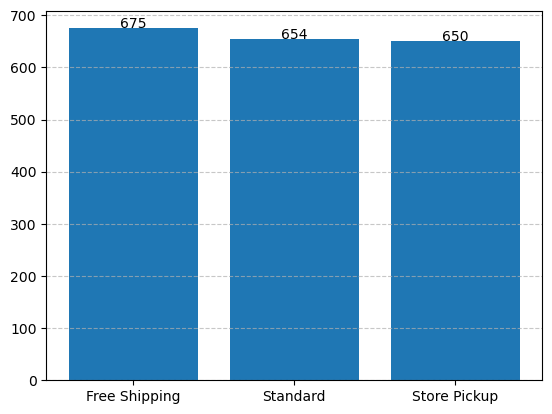

In [61]:
plt.bar(top3_Shipping_Type.index,top3_Shipping_Type.values)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# إضافة الأرقام فوق كل عمود
for i, value in enumerate(top3_Shipping_Type.values):
    plt.text(i, value + 0.5, str(value), ha='center', fontsize=10) 
plt.show()

#### 14- Discount_Applied Column

In [62]:
Discount_Applied=df["Discount_Applied"].value_counts()
Discount_Applied

Discount_Applied
No     2223
Yes    1677
Name: count, dtype: int64

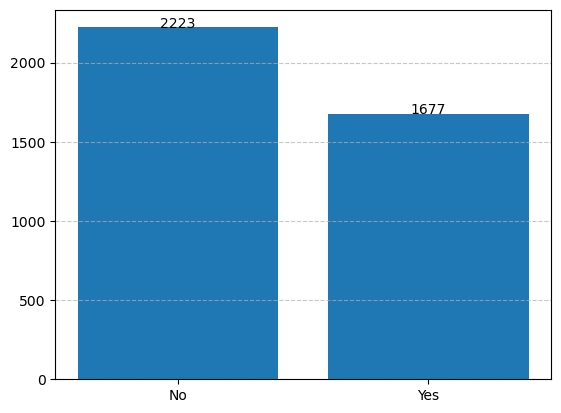

In [63]:
plt.bar(Discount_Applied.index,Discount_Applied.values)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# إضافة الأرقام فوق كل عمود
for i, value in enumerate(Discount_Applied.values):
    plt.text(i, value + 0.5, str(value), ha='center', fontsize=10) 
plt.show()

In [64]:
df.drop(columns="Promo_Code_Used",inplace=True)

#### 15- Previous_Purchases Column

In [65]:
df["Previous_Purchases"].unique()

array([14,  2, 23, 49, 31, 19,  8,  4, 26, 10, 37, 34, 44, 36, 17, 46, 50,
       22, 32, 40, 16, 13,  7, 41, 45, 38, 48, 18, 15, 25, 39, 35, 29, 21,
       43,  3,  5, 24, 42, 47, 28, 20, 33,  1,  9, 12, 27, 11, 30,  6],
      dtype=int64)

In [66]:
df["Previous_Purchases"].nunique()

50

In [67]:
Previous_Purchases=df["Previous_Purchases"].value_counts().head(3)
Previous_Purchases

Previous_Purchases
31    97
21    96
14    92
Name: count, dtype: int64

#### 16- Preferred_Payment_Method Comlumn

In [68]:
df["Preferred_Payment_Method"].unique()

array(['Venmo', 'Cash', 'Credit Card', 'PayPal', 'Bank Transfer',
       'Debit Card'], dtype=object)

In [69]:
df["Preferred_Payment_Method"].nunique()

6

In [70]:
Preferred_Payment_Method=df["Preferred_Payment_Method"].value_counts()
Preferred_Payment_Method

Preferred_Payment_Method
PayPal           677
Credit Card      671
Cash             670
Debit Card       636
Venmo            634
Bank Transfer    612
Name: count, dtype: int64

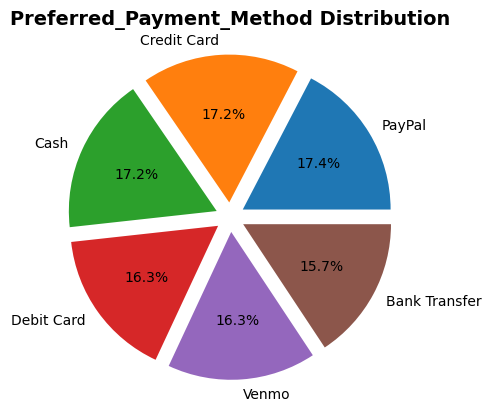

In [71]:
plt.pie(Preferred_Payment_Method,(.1,.1,.1,.1,.1,.1),Preferred_Payment_Method.index,autopct='%1.1f%%')
plt.title("Preferred_Payment_Method Distribution",fontdict={'fontsize': 14, 'fontweight': 'bold'})
plt.show()

In [72]:
top_3_Preferred_Payment_Method=Preferred_Payment_Method.head(3)
top_3_Preferred_Payment_Method

Preferred_Payment_Method
PayPal         677
Credit Card    671
Cash           670
Name: count, dtype: int64

#### 17- Frequency_of_Purchases Column

In [73]:
df["Frequency_of_Purchases"].unique()

array(['Fortnightly', 'Weekly', 'Annually', 'Quarterly', 'Bi-Weekly',
       'Monthly', 'Every 3 Months'], dtype=object)

In [74]:
df["Frequency_of_Purchases"].nunique()

7

In [75]:
Frequency_of_Purchases=df["Frequency_of_Purchases"].value_counts()
Frequency_of_Purchases

Frequency_of_Purchases
Every 3 Months    584
Annually          572
Quarterly         563
Monthly           553
Bi-Weekly         547
Fortnightly       542
Weekly            539
Name: count, dtype: int64

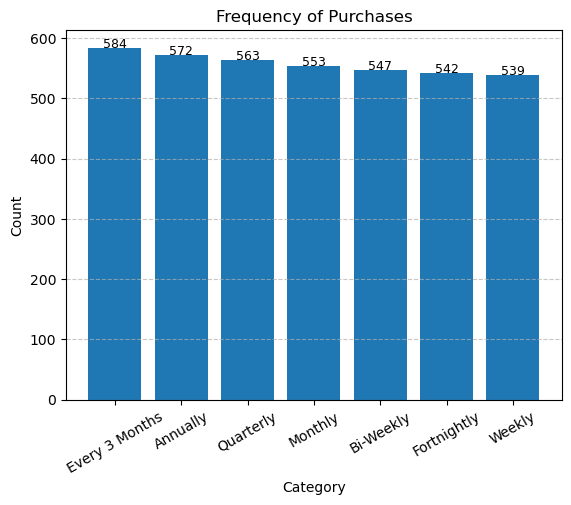

In [76]:
bars = plt.bar(Frequency_of_Purchases.index.astype(str), Frequency_of_Purchases.values)
plt.grid(axis='y', linestyle='--', alpha=0.7)

for bar in bars:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.5,
             str(bar.get_height()), ha='center', fontsize=9)

plt.title("Frequency of Purchases")
plt.xlabel("Category")
plt.ylabel("Count")
plt.xticks(rotation=30)
plt.show()


## Important Insights 

#### What are the average purechase by age group?

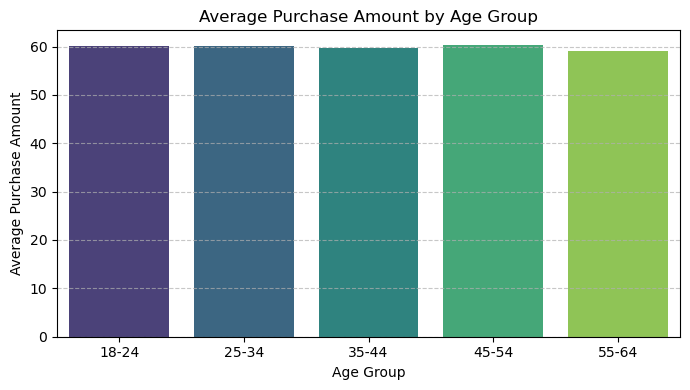

In [77]:
# Create age groups
df['Age_Group'] = pd.cut(df['Age'], bins=[17, 24, 34, 44, 54, 65],labels=['18-24', '25-34', '35-44', '45-54', '55-64'])

# Calculate average spending per age group
age_spending = df.groupby('Age_Group')['Purchase_Amount_USD'].mean().reset_index()

# Plot
plt.figure(figsize=(7, 4))
sns.barplot(x='Age_Group', y='Purchase_Amount_USD', data=age_spending, palette='viridis')
plt.title('Average Purchase Amount by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Average Purchase Amount')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

#### Do males and females have different purchasing behavior?

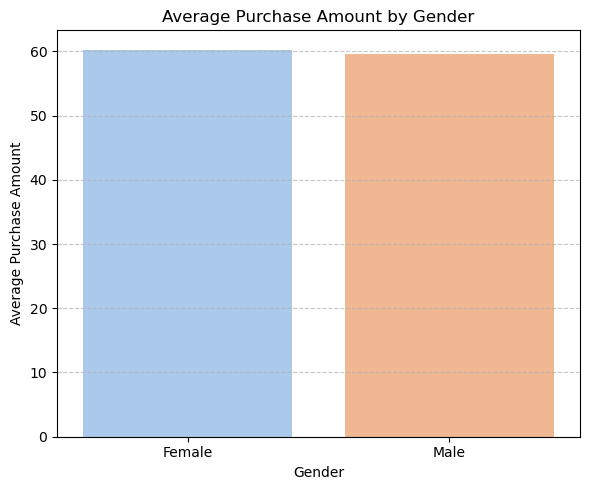

In [78]:
# Calculate average purchase amount by gender
gender_spending = df.groupby('Gender')['Purchase_Amount_USD'].mean().reset_index()

# Plot
plt.figure(figsize=(6, 5))
sns.barplot(x='Gender', y='Purchase_Amount_USD', data=gender_spending, palette='pastel')
plt.title('Average Purchase Amount by Gender')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xlabel('Gender')
plt.ylabel('Average Purchase Amount')
plt.tight_layout()
plt.show()


#### What are the most popular product categories?

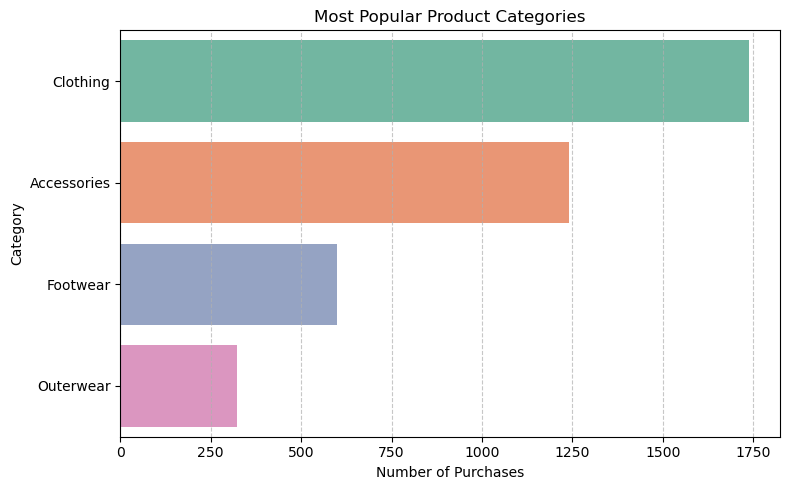

In [79]:
# Count number of purchases per category
category_counts = df['Category'].value_counts().reset_index()
category_counts.columns = ['Category', 'Count']

# Plot
plt.figure(figsize=(8, 5))
sns.barplot(x='Count', y='Category', data=category_counts, palette='Set2')
plt.title('Most Popular Product Categories')
plt.xlabel('Number of Purchases')
plt.ylabel('Category')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


#### Does the payment method affect the average purchase amount?

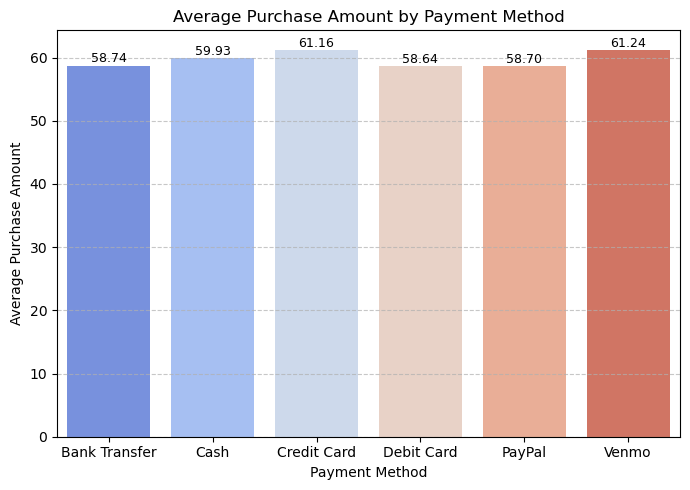

In [80]:
# Group by Payment Method and calculate average purchase amount
payment_avg = df.groupby('Payment_Method')['Purchase_Amount_USD'].mean().reset_index()

# Plot
plt.figure(figsize=(7, 5))
ax = sns.barplot(x='Payment_Method', y='Purchase_Amount_USD', data=payment_avg, palette='coolwarm')

for bar in ax.patches:
    ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.5, f"{bar.get_height():.2f}", ha='center', fontsize=9)

# تحسينات الشكل
plt.title('Average Purchase Amount by Payment Method')
plt.xlabel('Payment Method')
plt.ylabel('Average Purchase Amount')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


#### What is the number of requests by city ?

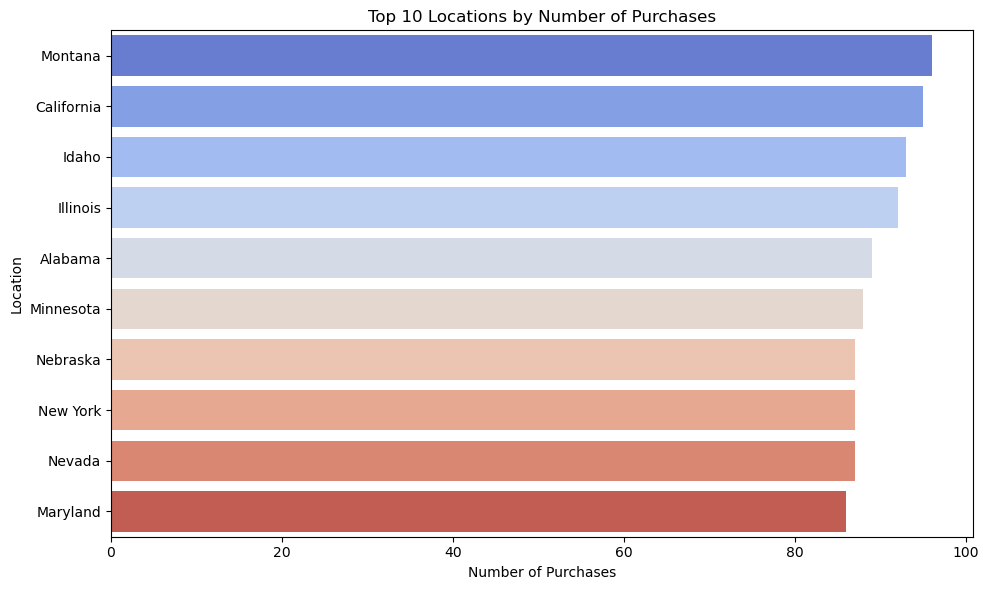

In [81]:
# Count of orders per location
top_locations = df['Location'].value_counts().reset_index()
top_locations.columns = ['Location', 'Number_of_Purchases']

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Number_of_Purchases', y='Location', data=top_locations.head(10), palette='coolwarm')
plt.title('Top 10 Locations by Number of Purchases')
plt.xlabel('Number of Purchases')
plt.ylabel('Location')
plt.tight_layout()
plt.show()


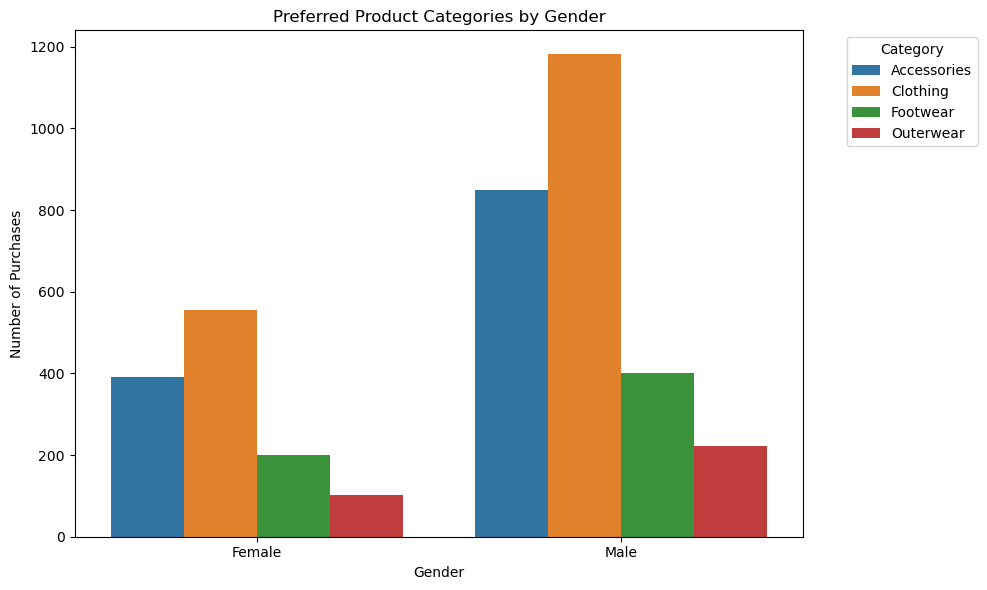

In [82]:
# Count number of purchases per Gender and Category
gender_category = df.groupby(['Gender', 'Category']).size().reset_index(name='Count')

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Gender', y='Count', hue='Category', data=gender_category)
plt.title('Preferred Product Categories by Gender')
plt.xlabel('Gender')
plt.ylabel('Number of Purchases')
plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


#### Which product categories have low average price but high purchase frequency?

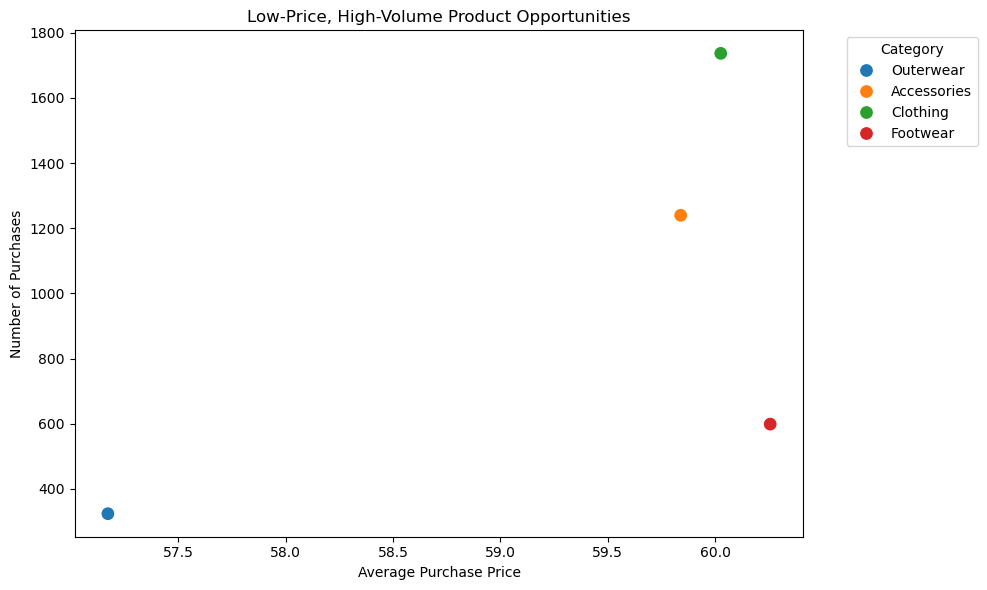

In [83]:
# Calculate average price and total count per category
category_stats = df.groupby('Category').agg(
    Average_Price=('Purchase_Amount_USD', 'mean'),
    Purchase_Count=('Category', 'count')
).reset_index()

# Sort by lowest average price + highest purchase count
category_stats_sorted = category_stats.sort_values(by=['Average_Price', 'Purchase_Count'], ascending=[True, False])

# Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=category_stats_sorted, x='Average_Price', y='Purchase_Count', hue='Category', s=100)
plt.title('Low-Price, High-Volume Product Opportunities')
plt.xlabel('Average Purchase Price')
plt.ylabel('Number of Purchases')
plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


#### What Average Spending by City (Location)?

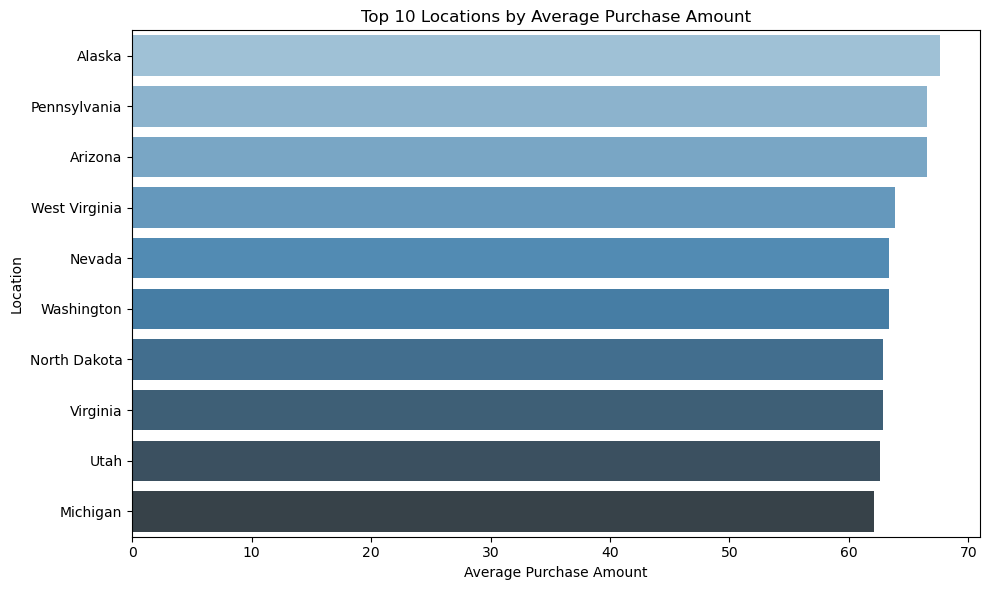

In [84]:
# Calculate average purchase amount per location
location_avg_purchase = df.groupby('Location')['Purchase_Amount_USD'].mean().reset_index().sort_values(by='Purchase_Amount_USD', ascending=False)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Purchase_Amount_USD', y='Location', data=location_avg_purchase.head(10), palette='Blues_d')
plt.title('Top 10 Locations by Average Purchase Amount')
plt.xlabel('Average Purchase Amount')
plt.ylabel('Location')
plt.tight_layout()
plt.show()


## Save Data After Cleaning

In [85]:
df.to_excel('cleaned_shopping_trends_data.xlsx')